# Intro
Name:  

    LeBlanc_2015_paper_file_restore

Purpose:  

    Laod the cloud property retrieval data from the paper, for saving into a shareable format with Kokhanovsky
  
Input:

    none at command line
  
Output:

    ict file save
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - retrieved_kisq_20120525_v9.out  retrieved_kisq_20120806_v9.out  retrieved_kisq_20130110_v9.out
  
 Modification History:
 
     Written: by Samuel LeBlanc, Santa Cruz, 2019-11-29

# Import modules

In [1]:
import numpy as np
import hdf5storage as hs
import os
import write_utils as wu
import scipy.io as sio
from path_utils import getpath
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
from Sp_parameters import smooth
from load_utils import load_from_json, mat2py_time,toutc
import write_utils as wu

In [4]:
import Sun_utils as su
from datetime import datetime
import pytz
import map_utils as mu

In [5]:
name = 'SSFR3'

In [6]:
vv = 'v9'

In [7]:
fp = getpath('SSFR3')
fp_dat = getpath('SSFR3')+'data/'

Return path named:  SSFR3 /mnt/c/Users/lebla/Research/SSFR3/
Return path named:  SSFR3 /mnt/c/Users/lebla/Research/SSFR3/


# Load the files

In [8]:
days = ['20120525','20120806','20130110']
labels = ['Liquid','Mixed-phase','Ice']

In [9]:
times = [[15.0,16.0],[22.0,23.0],[17.5,19.5]]

## Load the 15 parameters retrievals

In [10]:
f_liq = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[0],v=vv))
f_mix = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[1],v=vv))
f_ice = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[2],v=vv))

In [11]:
f_liq.keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

## Load the slope retrievals

In [12]:
sl_liq = sio.idl.readsav(fp_dat+'{d}_cld_parms3_1600nm.out'.format(d=days[0]))
sl_mix = sio.idl.readsav(fp_dat+'{d}_cld_parms3_1600nm.out'.format(d=days[1]))
sl_ice = sio.idl.readsav(fp_dat+'{d}_cld_parms3_ic_1600nm.out'.format(d=days[2]))

In [13]:
sl_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

## Load the 2wvl retrievals

In [14]:
twv_liq = sio.idl.readsav(fp_dat+'{d}_cld_parms3_2wvl_1600nm.out'.format(d=days[0]))
twv_mix = sio.idl.readsav(fp_dat+'{d}_cld_parms3_2wvl_1600nm.out'.format(d=days[1]))
twv_ice = sio.idl.readsav(fp_dat+'{d}_cld_parms3_ic_2wvl_1600nm.out'.format(d=days[2]))

In [15]:
twv_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

## Load the spectra

In [16]:
sp_liq = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[0],v=vv))
sp_mix = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[1],v=vv))
sp_ice = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[2],v=vv))

In [17]:
sp_liq.keys()

['status',
 'darks',
 'zenlambda',
 'zer',
 'nadlambda',
 'nspectra',
 'zspectra',
 'sat',
 'ner',
 'tmhrs']

In [18]:
sp_liq['zspectra'].shape

(53096, 393)

In [19]:
sp_liq['tmhrs'].shape

(53096,)

In [20]:
sp_liq['status']

array(['Measurement date    : 2012 05 25',
       'Processing date     : 2012 11 06',
       'Platform            : Skywatch', 'Integration times   : ',
       '                   25          50         100         300',
       'Response functions  :',
       'Zenith Si           : /home/leblanc/DC3_SEAC4RS/cal/SSFR3/20120419_765C_resp_25_zensi.dat',
       'Zenith InGaAs       : /home/leblanc/DC3_SEAC4RS/cal/SSFR3/20120419_765C_resp_50_zenir.dat',
       'Nadir Si            : 20120508_506C_resp_100_nadsi.dat',
       'Nadir InGaAs        : 20120508_506C_resp_300_nadir.dat',
       'Dark Mode           : I',
       'Saturation          :          398 spectra /       53096',
       'Joinder Zenith      :       981.000',
       'Joinder Nadir       :       981.000',
       'Number data files   :          590',
       'Number of darks     :       49',
       'Data file location  : /argus/SSFR3/data//20120525/*.OSA'],
      dtype=object)

## Load the Kurudz solar downwelling

In [21]:
fso = getpath('uvspec_dat')

Return path named:  uvspec_dat /mnt/c/Users/lebla/Research/libradtran/libRadtran-2.0.2/data/


In [22]:
ku = np.genfromtxt(fso+'solar_flux/kurudz_1.0nm.dat')  # mW / (m2 nm), with wavelength in nm

In [23]:
ku

array([[2.500000e+02, 6.352968e+01],
       [2.510000e+02, 4.395971e+01],
       [2.520000e+02, 2.909898e+01],
       ...,
       [9.998000e+03, 2.441999e-01],
       [9.999000e+03, 2.441391e-01],
       [1.000000e+04, 2.436120e-01]])

In [24]:
ku[980-250,0]

980.0

In [25]:
vis_slit = np.genfromtxt(fp+'pro/rtm2/vis_1nm.dat')

In [26]:
nir_slit = np.genfromtxt(fp+'pro/rtm2/nir_1nm.dat')

Calculate the downwelling solar irradiance at TOA by convolving the slit functions and the kurudz

In [27]:
wvl_vis = sp_liq['zenlambda'][0:194]

In [28]:
wvl_nir = sp_liq['zenlambda'][194:]

In [29]:
vis_slit[:,1] = vis_slit[:,1]/np.sum(vis_slit[:,1])

In [30]:
nir_slit[:,1] = nir_slit[:,1]/np.sum(nir_slit[:,1])

In [31]:
ku_vis = np.array([np.sum([ku[i+7+int(j),1]*v for j,v in vis_slit]) for i,k in enumerate(ku[7:980-250,1])])

In [32]:
ku_vis

array([ 124.10050785,  125.01959358,  115.79841606,  108.61789525,
        117.35934043,  151.31395305,  213.44901876,  285.21831327,
        340.31193372,  365.62914122,  364.90905455,  354.35178946,
        339.92885857,  313.98624979,  274.9636492 ,  234.30685893,
        200.38074618,  184.27528518,  187.60689558,  197.30440607,
        198.36007712,  181.27817778,  159.44296413,  161.95810871,
        200.18652621,  249.20701489,  273.9708007 ,  265.74466571,
        257.40240016,  283.6528036 ,  347.87031666,  433.50309005,
        516.1850513 ,  582.77745855,  625.32962293,  632.93851016,
        618.20923004,  600.08896827,  588.11697965,  580.90806487,
        581.33494542,  587.78724946,  599.7816002 ,  620.76525184,
        637.28741009,  660.34122574,  684.99130736,  702.52902538,
        712.71854836,  714.02320566,  714.5016885 ,  713.81277709,
        720.54716707,  740.80602461,  762.32911606,  778.7445344 ,
        779.42778434,  763.06840391,  747.57211625,  738.65886

In [33]:
ku_nir = np.array([np.sum([ku[i+980-250+int(j),1]*v for j,v in nir_slit]) for i,k in enumerate(ku[980-250:-15,1])])

<IPython.core.display.Javascript object>


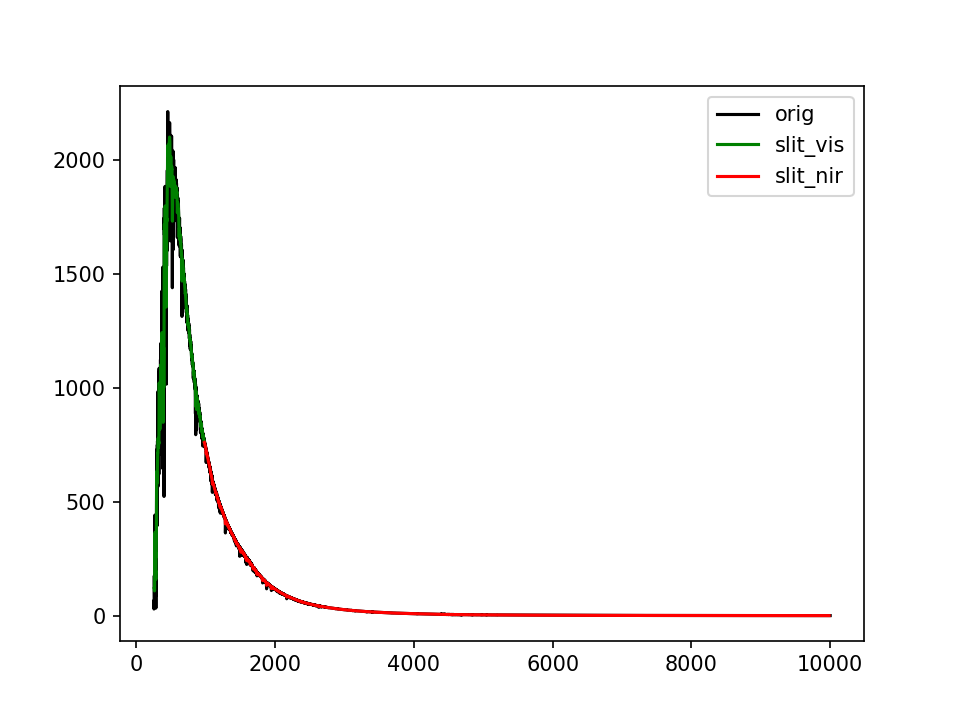

In [34]:
plt.figure()
plt.plot(ku[:,0],ku[:,1],'-k',label='orig')
plt.plot(ku[7:980-250,0],ku_vis,'-g',label='slit_vis')
plt.plot(ku[980-250:-15,0],ku_nir,'-r',label='slit_nir')
plt.legend()

In [35]:
from scipy import interpolate

In [38]:
sp_liq['zenlambda'][0:194]

array([350.92947, 354.22186, 357.5145 , 360.8074 , 364.10052, 367.39383,
       370.6874 , 373.98114, 377.2751 , 380.56924, 383.86356, 387.15802,
       390.45264, 393.7474 , 397.04233, 400.33737, 403.63254, 406.9278 ,
       410.22314, 413.51862, 416.81412, 420.10977, 423.40543, 426.70114,
       429.9969 , 433.2927 , 436.5885 , 439.8843 , 443.18015, 446.47595,
       449.7718 , 453.06757, 456.3633 , 459.65903, 462.95468, 466.25027,
       469.54578, 472.8412 , 476.13654, 479.43176, 482.7269 , 486.02188,
       489.31677, 492.6115 , 495.90607, 499.2005 , 502.49475, 505.78888,
       509.08276, 512.3764 , 515.66986, 518.9632 , 522.2562 , 525.549  ,
       528.84155, 532.1339 , 535.4259 , 538.7177 , 542.00916, 545.3004 ,
       548.5913 , 551.8819 , 555.1721 , 558.46204, 561.7516 , 565.04083,
       568.3298 , 571.6182 , 574.90643, 578.1941 , 581.4815 , 584.7683 ,
       588.05493, 591.34106, 594.6267 , 597.9119 , 601.19666, 604.4809 ,
       607.7647 , 611.0481 , 614.3309 , 617.6133 , 

In [43]:
sun_vis_fx = interpolate.interp1d(ku[7:980-250,0],ku_vis,fill_value='extrapolate')
sun_vis = sun_vis_fx(sp_liq['zenlambda'][0:194])

sun_nir_fx = interpolate.interp1d(ku[980-250:-15,0],ku_nir,fill_value='extrapolate')
sun_nir = sun_nir_fx(sp_liq['zenlambda'][194:])

In [46]:
sun = np.append(sun_vis,sun_nir)

In [47]:
wvl = sp_liq['zenlambda']

<IPython.core.display.Javascript object>


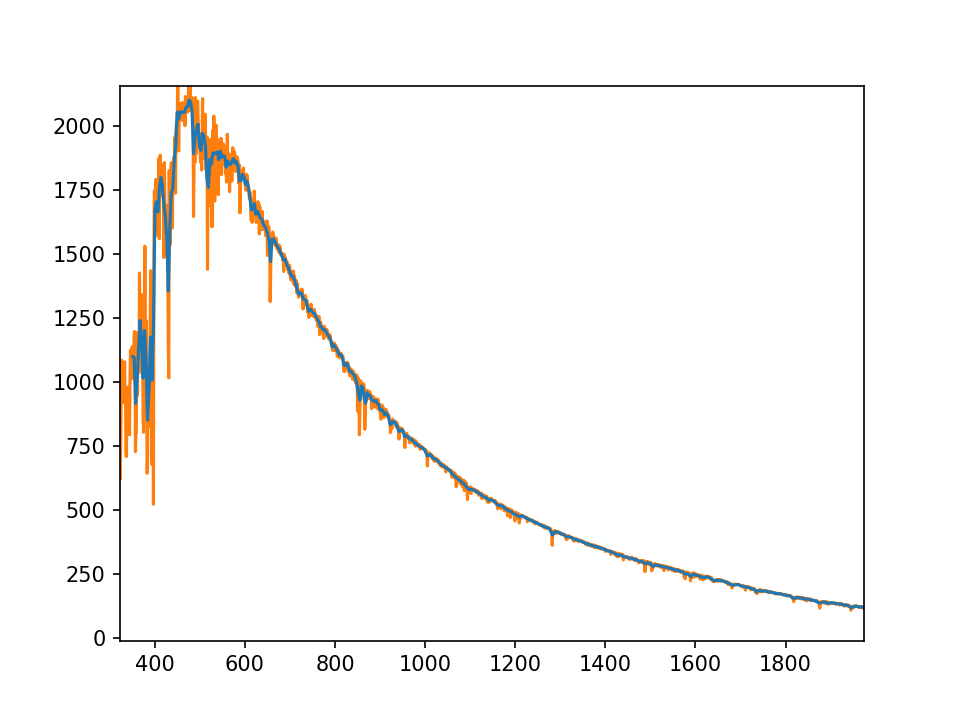

In [50]:
plt.figure()
plt.plot(wvl,sun)
plt.plot(ku[:,0],ku[:,1],zorder=-1)

In [90]:
i440 = np.argmin(abs(wvl-440.0))
i1020 = np.argmin(abs(wvl-1020.0))
i1640 = np.argmin(abs(wvl-1640.0))

In [126]:
sun0440 = sun[i440]/1000.0
sun1020 = sun[i1020]/1000.0
sun1640 = sun[i1640]/1000.0

# Verify the results and write out

In [160]:
hdict = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'University of Colorado, Duane rooftop, Boulder, Colorado, USA, Lat: 40.01 N, Lon: 105.25 W, Alt: 1660 m',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT, https://doi.org/10.5194/amt-8-1361-2015',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in November, 2019.'
    }
order = ['COD','COD_err_low','COD_err_up','REF','REF_err_low','REF_err_up','Phase','Ki_square']

## 15 parameters retrieval

In [100]:
f_liq.keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

<IPython.core.display.Javascript object>


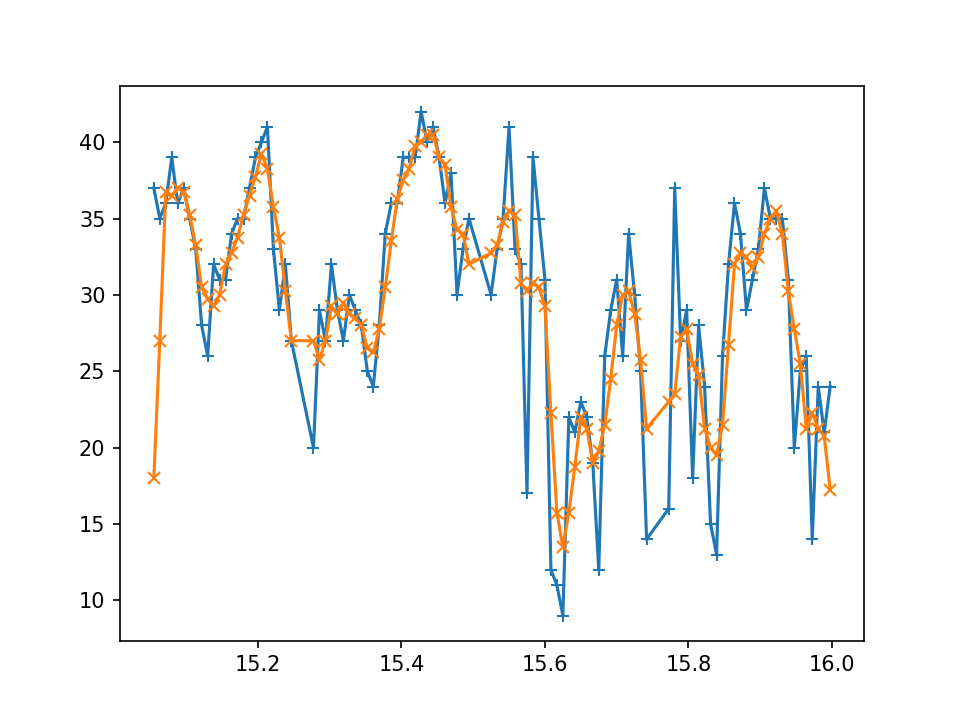

In [101]:
plt.figure()
plt.plot(f_liq['tmhrs'],f_liq['tau_rtm'],'-+')
plt.plot(f_liq['tmhrs'],smooth(f_liq['tau_rtm'],4,old=True),'-x')


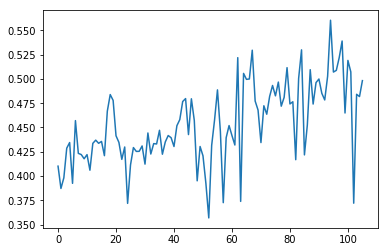

In [46]:
plt.figure()
plt.plot(f_liq['ki_rtm'])

In [48]:
f_liq['ref_err'].shape

(2, 106)

In [55]:
f = [f_liq,f_mix,f_ice]

In [56]:
def fo(gu,nn):

    gu['tau_rtm'][nn] = np.nan
    gu['ref_rtm'][nn] = np.nan
    gu['tau_err'][0,nn] = np.nan
    gu['ref_err'][0,nn] = np.nan
    gu['tau_err'][1,nn] = np.nan
    gu['ref_err'][1,nn] = np.nan
    gu['ki_rtm'][nn] = np.nan
    gu['wp_rtm'][nn] = np.nan
    return gu

In [57]:
rtr = []
for i,g in enumerate(f):
    ff = {}
    for k in g.keys(): ff[k] = np.array(g[k])
    ff['tau_rtm'] = smooth(ff['tau_rtm'],4,old=True)
    ff['ref_rtm'] = smooth(ff['ref_rtm'],4,old=True)
    tr = ff['tau_rtm']==0
    if any(tr): ff = fo(ff,tr)
    trm = ff['tau_rtm']>99.0
    if any(trm): ff = fo(ff,trm)
    rr = ff['ref_rtm']==0
    if any(rr): ff = fo(ff,rr)
    rrm = ff['ref_rtm']>99.0
    if any(rrm): ff = fo(ff,rrm)
    kr = ff['ki_rtm']>0.69
    if any(kr): ff = fo(ff,kr)
    rem = ff['ref_err'][0,:]>3.0
    if any(rem): ff['ref_err'][0,rem] = 3.0
    if i==0:
        wr = ff['wp_rtm']==1
        if any(wr): ff = fo(ff,wr)
    elif i==2:
        wr = ff['wp_rtm']==0
        if any(wr): ff = fo(ff,wr)
    rtr.append(ff)

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [58]:
rtr[0].keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

### save liquid cloud

In [161]:
dict_fliq =  {'Start_UTC':{'data':rtr[0]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[0]['tau_rtm'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[0]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[0]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[0]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[0]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[0]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[0]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[0]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [162]:
hdict_fliq = hdict
hdict_fliq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [163]:
wu.write_ict(hdict_fliq,dict_fliq,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order)    

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20120525_R0.ict


### Save mix phase cloud

In [164]:
dict_fmix =  {'Start_UTC':{'data':rtr[1]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[1]['tau_rtm'],'unit':'None',
             'long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[1]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[1]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[1]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[1]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[1]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[1]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[1]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [165]:
hdict_mix = hdict
hdict_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [166]:
wu.write_ict(hdict_mix,dict_fmix,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order) 

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [167]:
dict_fice =  {'Start_UTC':{'data':rtr[2]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[2]['tau_rtm'],'unit':'None',
             'long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[2]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[2]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[2]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[2]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[2]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[2]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[2]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [168]:
hdict_ice = hdict
hdict_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [169]:
wu.write_ict(hdict_ice,dict_fice,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order) 

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20130110_R0.ict


## slope retrieval

In [114]:
sl_liq

{'eref': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'etau': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'ref': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'tau': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'tmhrs': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [115]:
sl = [sl_liq,sl_mix,sl_ice]

In [133]:
rsl = []
for i,g in enumerate(sl):
    fsl = {}
    tr = g['tau']!=0
    fsl['COD'] = g['tau'][tr]
    fsl['REF'] = g['ref'][tr]
    fsl['REF_ERR'] = g['eref'][tr]
    fsl['COD_ERR'] = g['etau'][tr]
    fsl['utc'] = g['tmhrs'][tr]
    rsl.append(fsl)

In [131]:
rsl[2]['utc']

array([17.519722, 17.528055, 17.536388, 17.544722, 17.553055, 17.561388,
       17.569723, 17.578056, 17.58639 , 17.594723, 17.603056, 17.61139 ,
       17.619722, 17.628056, 17.636389, 17.644722, 17.653055, 17.661388,
       17.669722, 17.678055, 17.686388, 17.694723, 17.703056, 17.71139 ,
       17.719723, 17.728056, 17.73639 , 17.744722, 17.775555, 17.78389 ,
       17.792223, 17.800556, 17.80889 , 17.817223, 17.825556, 17.833889,
       17.842222, 17.850555, 17.858889, 17.867222, 17.875555, 17.883888,
       17.892221, 17.900555, 17.90889 , 17.917223, 17.925556, 17.93389 ,
       17.942223, 17.950556, 17.958889, 17.967222, 17.975555, 17.983889,
       17.992222, 18.020277, 18.02861 , 18.036945, 18.045279, 18.053612,
       18.061945, 18.070278, 18.078611, 18.086945, 18.095278, 18.103611,
       18.111944, 18.120277, 18.12861 , 18.136944, 18.145277, 18.15361 ,
       18.161945, 18.170279, 18.178612, 18.186945, 18.195278, 18.203611,
       18.211945, 18.220278, 18.228611, 18.236944, 

### Save liquid cloud

In [170]:
hdict_sl = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'University of Colorado, Duane rooftop, Boulder, Colorado, USA, Lat: 40.01 N, Lon: 105.25 W, Alt: 1660 m',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the cloud property retrieval method based on slope at 1600 nm from transmitted light measurements described by McBride et al., 2011, doi:10.5194/acp-11-7235-2011.',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in December, 2019.'
    }
order_sl = ['COD','COD_err','REF','REF_err']

In [171]:
dict_sl_liq =  {'Start_UTC':{'data':rsl[0]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[0]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[0]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[0]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[0]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [172]:
hdict_sl_liq = hdict_sl
hdict_sl_liq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [173]:
wu.write_ict(hdict_sl_liq,dict_sl_liq,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20120525_R0.ict


### Save mix-phase cloud

In [174]:
dict_sl_mix =  {'Start_UTC':{'data':rsl[1]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[1]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[1]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[1]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[1]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [175]:
hdict_sl_mix = hdict_sl
hdict_sl_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [176]:
wu.write_ict(hdict_sl_mix,dict_sl_mix,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [177]:
dict_sl_ice =  {'Start_UTC':{'data':rsl[2]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[2]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[2]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[2]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[2]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [178]:
hdict_sl_ice = hdict_sl
hdict_sl_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [179]:
wu.write_ict(hdict_sl_ice,dict_sl_ice,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20130110_R0.ict


## 2wvl retrieval


In [143]:
twv = [twv_liq,twv_mix,twv_ice]

In [144]:
twv_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

In [146]:
rtw = []
for i,g in enumerate(twv):
    ftw = {}
    tr = g['tau']!=0
    ftw['COD'] = g['tau'][tr]
    ftw['REF'] = g['ref'][tr]
    ftw['REF_ERR'] = g['eref'][tr]
    ftw['COD_ERR'] = g['etau'][tr]
    ftw['utc'] = g['tmhrs'][tr]
    rtw.append(ftw)

In [72]:
rtw[0]['REF']

NameError: name 'rtw' is not defined

In [180]:
hdict_twv = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'University of Colorado, Duane rooftop, Boulder, Colorado, USA, Lat: 40.01 N, Lon: 105.25 W, Alt: 1660 m',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the 2 wavelength cloud property retrieval method from transmitted light measurements.',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in December, 2019.'
    }
order_twv = ['COD','COD_err','REF','REF_err']

### Save liquid cloud

In [181]:
dict_tw_liq =  {'Start_UTC':{'data':rtw[0]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[0]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[0]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[0]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[0]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [182]:
hdict_tw_liq = hdict_twv
hdict_tw_liq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [183]:
wu.write_ict(hdict_tw_liq,dict_tw_liq,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order_twv)  

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20120525_R0.ict


### Save mix phase cloud

In [184]:
dict_tw_mix =  {'Start_UTC':{'data':rtw[1]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[1]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[1]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[1]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[1]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [185]:
hdict_tw_mix = hdict_twv
hdict_tw_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [186]:
wu.write_ict(hdict_tw_mix,dict_tw_mix,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order_twv) 

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [263]:
dict_tw_ice =  {'Start_UTC':{'data':rtw[2]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[2]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[2]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[2]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[2]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [188]:
hdict_tw_ice = hdict_twv
hdict_tw_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [189]:
wu.write_ict(hdict_tw_ice,dict_tw_ice,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order_twv) 

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20130110_R0.ict


## Spectra

In [216]:
lat = 40.01
lon = -105.25
alt = 1660.0

In [193]:
sp_liq.keys()

['status',
 'darks',
 'zenlambda',
 'zer',
 'nadlambda',
 'nspectra',
 'zspectra',
 'sat',
 'ner',
 'tmhrs']

In [225]:
sp = [sp_liq,sp_mix,sp_ice]

In [230]:
ut = [[15.0,16.0],[22.0,23.0],[17.5,19.5]]

In [257]:
rsp = []
for i,g in enumerate(sp):
    fsp = {}
    dtu = np.array([datetime(int(days[i][0:4]),int(days[i][4:6]),int(days[i][6:8])+(int(u)/24+1),
                             int(u%24),int((u-int(u))*60),int(((u-int(u))*60)-int((u-int(u))*60))*60,
                             tzinfo=pytz.timezone('UTC')) for u in g['tmhrs']])
    sza, azi,solfac = mu.get_sza_azi(lat,lon,dtu,alt=alt,return_sunearthfactor=True)
    tp = (g['tmhrs']>=ut[i][0]) & (g['tmhrs']<=ut[i][1]) & (g['sat']==0) & (g['zspectra'][:,50]>0.0003)
    fsp['utc'] = g['tmhrs'][tp]
    fsp['sza'] = np.array(sza)[tp]
    fsp['wvl'] = g['zenlambda']
    fsp['rad'] = g['zspectra'][tp,:]
    rsp.append(fsp)

In [254]:
hdict_sp = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'University of Colorado, Duane rooftop, Boulder, Colorado, USA, Lat: 40.01 N, Lon: 105.25 W, Alt: 1660 m',
     'instrument_info':'SSFR spectral radiances with zenith narrow field of view radiance light collector',
     'data_info':'Radiance calibrated with lab measurement using NIST traceable lamp and spectralon panel. See details in LeBlanc et al., 2015, AMT, DOI:10.5194/amt-8-1361-2015 ',
     'uncertainty':'month to month variability of accuracy at 8% in radiance. spectral and day to day precision at higher than 0.1%',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in December, 2019.'
    }

In [259]:
rsp[0]['wvl']

array([ 350.92947,  354.22186,  357.5145 ,  360.8074 ,  364.10052,
        367.39383,  370.6874 ,  373.98114,  377.2751 ,  380.56924,
        383.86356,  387.15802,  390.45264,  393.7474 ,  397.04233,
        400.33737,  403.63254,  406.9278 ,  410.22314,  413.51862,
        416.81412,  420.10977,  423.40543,  426.70114,  429.9969 ,
        433.2927 ,  436.5885 ,  439.8843 ,  443.18015,  446.47595,
        449.7718 ,  453.06757,  456.3633 ,  459.65903,  462.95468,
        466.25027,  469.54578,  472.8412 ,  476.13654,  479.43176,
        482.7269 ,  486.02188,  489.31677,  492.6115 ,  495.90607,
        499.2005 ,  502.49475,  505.78888,  509.08276,  512.3764 ,
        515.66986,  518.9632 ,  522.2562 ,  525.549  ,  528.84155,
        532.1339 ,  535.4259 ,  538.7177 ,  542.00916,  545.3004 ,
        548.5913 ,  551.8819 ,  555.1721 ,  558.46204,  561.7516 ,
        565.04083,  568.3298 ,  571.6182 ,  574.90643,  578.1941 ,
        581.4815 ,  584.7683 ,  588.05493,  591.34106,  594.62

### Save the liquid cloud

In [275]:
dict_sp_liq =  {'Start_UTC':{'data':rsp[0]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rsp[0]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'}}
order_sp = ['SZA']

In [276]:
for i,n in enumerate(rsp[0]['wvl']):
    dict_sp_liq['rad_{:06.1f}'.format(n)]={'data':rsp[0]['rad'][:,i],'unit':'W/m^2/nm/sr','long_description':'Zenith radiance measured at {} nm'.format(n)}
    order_sp.append('rad_{:06.1f}'.format(n))

In [277]:
hdict_sp_liq = hdict_sp
hdict_sp_liq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [278]:
wu.write_ict(hdict_sp_liq,dict_sp_liq,filepath=fp,
              data_id='SSFR_Zenith_radiance',loc_id='Boulder',date=days[0],rev='R0',order=order_sp) 

SZA
rad_0350.9
rad_0354.2
rad_0357.5
rad_0360.8
rad_0364.1
rad_0367.4
rad_0370.7
rad_0374.0
rad_0377.3
rad_0380.6
rad_0383.9
rad_0387.2
rad_0390.5
rad_0393.7
rad_0397.0
rad_0400.3
rad_0403.6
rad_0406.9
rad_0410.2
rad_0413.5
rad_0416.8
rad_0420.1
rad_0423.4
rad_0426.7
rad_0430.0
rad_0433.3
rad_0436.6
rad_0439.9
rad_0443.2
rad_0446.5
rad_0449.8
rad_0453.1
rad_0456.4
rad_0459.7
rad_0463.0
rad_0466.3
rad_0469.5
rad_0472.8
rad_0476.1
rad_0479.4
rad_0482.7
rad_0486.0
rad_0489.3
rad_0492.6
rad_0495.9
rad_0499.2
rad_0502.5
rad_0505.8
rad_0509.1
rad_0512.4
rad_0515.7
rad_0519.0
rad_0522.3
rad_0525.5
rad_0528.8
rad_0532.1
rad_0535.4
rad_0538.7
rad_0542.0
rad_0545.3
rad_0548.6
rad_0551.9
rad_0555.2
rad_0558.5
rad_0561.8
rad_0565.0
rad_0568.3
rad_0571.6
rad_0574.9
rad_0578.2
rad_0581.5
rad_0584.8
rad_0588.1
rad_0591.3
rad_0594.6
rad_0597.9
rad_0601.2
rad_0604.5
rad_0607.8
rad_0611.0
rad_0614.3
rad_0617.6
rad_0620.9
rad_0624.2
rad_0627.5
rad_0630.7
rad_0634.0
rad_0637.3
rad_0640.6
rad_0643.9
rad_06

### Save the mix phase cloud

In [279]:
dict_sp_mix =  {'Start_UTC':{'data':rsp[1]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rsp[1]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'}}

In [280]:
for i,n in enumerate(rsp[1]['wvl']):
    dict_sp_mix['rad_{:06.1f}'.format(n)]={'data':rsp[1]['rad'][:,i],'unit':'W/m^2/nm/sr','long_description':'Zenith radiance measured at {} nm'.format(n)}

In [281]:
hdict_sp_mix = hdict_sp
hdict_sp_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [282]:
wu.write_ict(hdict_sp_mix,dict_sp_mix,filepath=fp,
              data_id='SSFR_Zenith_radiance',loc_id='Boulder',date=days[1],rev='R0',order=order_sp)

SZA
rad_0350.9
rad_0354.2
rad_0357.5
rad_0360.8
rad_0364.1
rad_0367.4
rad_0370.7
rad_0374.0
rad_0377.3
rad_0380.6
rad_0383.9
rad_0387.2
rad_0390.5
rad_0393.7
rad_0397.0
rad_0400.3
rad_0403.6
rad_0406.9
rad_0410.2
rad_0413.5
rad_0416.8
rad_0420.1
rad_0423.4
rad_0426.7
rad_0430.0
rad_0433.3
rad_0436.6
rad_0439.9
rad_0443.2
rad_0446.5
rad_0449.8
rad_0453.1
rad_0456.4
rad_0459.7
rad_0463.0
rad_0466.3
rad_0469.5
rad_0472.8
rad_0476.1
rad_0479.4
rad_0482.7
rad_0486.0
rad_0489.3
rad_0492.6
rad_0495.9
rad_0499.2
rad_0502.5
rad_0505.8
rad_0509.1
rad_0512.4
rad_0515.7
rad_0519.0
rad_0522.3
rad_0525.5
rad_0528.8
rad_0532.1
rad_0535.4
rad_0538.7
rad_0542.0
rad_0545.3
rad_0548.6
rad_0551.9
rad_0555.2
rad_0558.5
rad_0561.8
rad_0565.0
rad_0568.3
rad_0571.6
rad_0574.9
rad_0578.2
rad_0581.5
rad_0584.8
rad_0588.1
rad_0591.3
rad_0594.6
rad_0597.9
rad_0601.2
rad_0604.5
rad_0607.8
rad_0611.0
rad_0614.3
rad_0617.6
rad_0620.9
rad_0624.2
rad_0627.5
rad_0630.7
rad_0634.0
rad_0637.3
rad_0640.6
rad_0643.9
rad_06

### Save the ice cloud

In [287]:
dict_sp_ice =  {'Start_UTC':{'data':rsp[2]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rsp[2]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'}}
order_spi = ['SZA']

In [288]:
for i,n in enumerate(rsp[2]['wvl']):
    dict_sp_ice['rad_{:06.1f}'.format(n)]={'data':rsp[2]['rad'][:,i],'unit':'W/m^2/nm/sr','long_description':'Zenith radiance measured at {} nm'.format(n)}
    order_spi.append('rad_{:06.1f}'.format(n))

In [289]:
hdict_sp_ice = hdict_sp
hdict_sp_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [290]:
wu.write_ict(hdict_sp_ice,dict_sp_ice,filepath=fp,
              data_id='SSFR_Zenith_radiance',loc_id='Boulder',date=days[2],rev='R0',order=order_spi)

SZA
rad_0350.9
rad_0354.2
rad_0357.5
rad_0360.8
rad_0364.1
rad_0367.4
rad_0370.7
rad_0374.0
rad_0377.3
rad_0380.6
rad_0383.9
rad_0387.2
rad_0390.5
rad_0393.7
rad_0397.0
rad_0400.3
rad_0403.6
rad_0406.9
rad_0410.2
rad_0413.5
rad_0416.8
rad_0420.1
rad_0423.4
rad_0426.7
rad_0430.0
rad_0433.3
rad_0436.6
rad_0439.9
rad_0443.2
rad_0446.5
rad_0449.8
rad_0453.1
rad_0456.4
rad_0459.7
rad_0463.0
rad_0466.3
rad_0469.5
rad_0472.8
rad_0476.1
rad_0479.4
rad_0482.7
rad_0486.0
rad_0489.3
rad_0492.6
rad_0495.9
rad_0499.2
rad_0502.5
rad_0505.8
rad_0509.1
rad_0512.4
rad_0515.7
rad_0519.0
rad_0522.3
rad_0525.5
rad_0528.8
rad_0532.1
rad_0535.4
rad_0538.7
rad_0542.0
rad_0545.3
rad_0548.6
rad_0551.9
rad_0555.2
rad_0558.5
rad_0561.8
rad_0565.0
rad_0568.3
rad_0571.6
rad_0574.9
rad_0578.2
rad_0581.5
rad_0584.8
rad_0588.1
rad_0591.3
rad_0594.6
rad_0597.9
rad_0601.2
rad_0604.5
rad_0607.8
rad_0611.0
rad_0614.3
rad_0617.6
rad_0620.9
rad_0624.2
rad_0627.5
rad_0630.7
rad_0634.0
rad_0637.3
rad_0640.6
rad_0643.9
rad_06

# Update for specific format requested by Kokhanovsky

From: Kokhanovsky Alexander <a.kokhanovsky@vitrocisetbelgium.com>
Sent: Tuesday, December 3, 2019 1:46 AM

My ideal format is

Date, SZA, T at 3 wavelengths (440, 1020,1640nm), surface albedo at these 3 wavelengths, your results for COT, LWP,a_ef(spectral method)

 

In [196]:
hdict = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'For Alexander Kokhanovsky',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top, University of Colorado',
     'location':'University of Colorado, Duane rooftop, Boulder, Colorado, USA, Lat: 40.01 N, Lon: 105.25 W, Alt: 1660 m',
     'instrument_info':'Selected Transmittances and derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT, https://doi.org/10.5194/amt-8-1361-2015',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in January, 2020.'
    }
order = ['DOY','SZA','T0440','T1020','T1640','COD','COD_err_low','COD_err_up','REF','REF_err_low','REF_err_up','Phase','LWP','Ki_square']

In [197]:
f = [f_liq,f_mix,f_ice]

In [198]:
def fo(gu,nn):

    gu['tau_rtm'][nn] = np.nan
    gu['ref_rtm'][nn] = np.nan
    gu['tau_err'][0,nn] = np.nan
    gu['ref_err'][0,nn] = np.nan
    gu['tau_err'][1,nn] = np.nan
    gu['ref_err'][1,nn] = np.nan
    gu['ki_rtm'][nn] = np.nan
    gu['wp_rtm'][nn] = np.nan
    return gu

In [199]:
rtr = []
for i,g in enumerate(f):
    ff = {}
    for k in g.keys(): ff[k] = np.array(g[k])
    ff['tau_rtm'] = smooth(ff['tau_rtm'],4,old=True)
    ff['ref_rtm'] = smooth(ff['ref_rtm'],4,old=True)
    tr = ff['tau_rtm']==0
    if any(tr): ff = fo(ff,tr)
    trm = ff['tau_rtm']>99.0
    if any(trm): ff = fo(ff,trm)
    rr = ff['ref_rtm']==0
    if any(rr): ff = fo(ff,rr)
    rrm = ff['ref_rtm']>99.0
    if any(rrm): ff = fo(ff,rrm)
    kr = ff['ki_rtm']>0.69
    if any(kr): ff = fo(ff,kr)
    rem = ff['ref_err'][0,:]>3.0
    if any(rem): ff['ref_err'][0,rem] = 3.0
    if i==0:
        wr = ff['wp_rtm']==1
        if any(wr): ff = fo(ff,wr)
    elif i==2:
        wr = ff['wp_rtm']==0
        if any(wr): ff = fo(ff,wr)
    rtr.append(ff)

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [200]:
rtr[0].keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

In [201]:
lat = 40.01
lon = -105.25
alt = 1660.0

In [202]:
sp = [sp_liq,sp_mix,sp_ice]

In [203]:
ut = [[15.0,16.0],[22.0,23.0],[17.5,19.5]]

In [204]:
i440 = np.argmin(abs(sp[0]['zenlambda']-440.0))
i1020 = np.argmin(abs(sp[0]['zenlambda']-1020.0))
i1640 = np.argmin(abs(sp[0]['zenlambda']-1640.0))

In [205]:
i440, i1020, i1640

(27, 199, 302)

In [206]:
from math import pi

In [207]:
from datetime import datetime

In [232]:
rsp = []
for i,g in enumerate(sp):
    fsp = {}
    dtu = np.array([datetime(int(days[i][0:4]),int(days[i][4:6]),int(days[i][6:8])+(int(u)/24+1),
                             int(u%24),int((u-int(u))*60),int(((u-int(u))*60)-int((u-int(u))*60))*60,
                             tzinfo=pytz.timezone('UTC')) for u in g['tmhrs']])
    sza, azi,solfac = mu.get_sza_azi(lat,lon,dtu,alt=alt,return_sunearthfactor=True)
    tp = (g['tmhrs']>=ut[i][0]) & (g['tmhrs']<=ut[i][1]) & (g['sat']==0) & (g['zspectra'][:,50]>0.0003)
    fsp['utc'] = g['tmhrs'][tp]
    fsp['sza'] = np.array(sza)[tp]
    fsp['solfac'] = np.array(solfac)[tp]
    fsp['s0440'] = g['zspectra'][tp,i440]
    fsp['s1020'] = g['zspectra'][tp,i1020]
    fsp['s1640'] = g['zspectra'][tp,i1640]
    
    fsp['t0440'] = fsp['s0440']*fsp['solfac']/np.cos(fsp['sza']*pi/180.0) / sun0440*pi
    fsp['t1020'] = fsp['s1020']*fsp['solfac']/np.cos(fsp['sza']*pi/180.0) / sun1020*pi
    fsp['t1640'] = fsp['s1640']*fsp['solfac']/np.cos(fsp['sza']*pi/180.0) / sun1640*pi
    
    fsp['doy'] = np.array([ddt.timetuple().tm_yday+g['tmhrs'][j]/24.0 for j,ddt in enumerate(dtu)])
    fsp['doy'] = fsp['doy'][tp]
    rsp.append(fsp)

In [233]:
g['zspectra'][tp,i1640]

array([0.00350078, 0.00351072, 0.00346604, ..., 0.0011416 , 0.00114658,
       0.00112176], dtype=float32)

In [234]:
rtr[0]['doy']

array([147.62729167, 147.62763889, 147.62798611, 147.62833333,
       147.62868056, 147.62902778, 147.629375  , 147.62972222,
       147.63006944, 147.63041667, 147.63076389, 147.63111111,
       147.63145833, 147.63180556, 147.63215278, 147.6325    ,
       147.63284722, 147.63319444, 147.63354167, 147.63388889,
       147.63423611, 147.63458333, 147.63493056, 147.63527778,
       147.6365625 , 147.63690972, 147.63725694, 147.63760417,
       147.63795139, 147.63829861, 147.63864583, 147.63899306,
       147.63934028, 147.6396875 , 147.64003472, 147.64038194,
       147.64072917, 147.64107639, 147.64142361, 147.64177083,
       147.64211806, 147.64246528, 147.6428125 , 147.64315972,
       147.64350694, 147.64385417, 147.64420139, 147.64454861,
       147.64489583, 147.64524306, 147.64559028, 147.646875  ,
       147.64722222, 147.64756944, 147.64791667, 147.64826389,
       147.64861111, 147.64895833, 147.64930556, 147.64965278,
       147.65      , 147.65034722, 147.65069444, 147.65

<IPython.core.display.Javascript object>


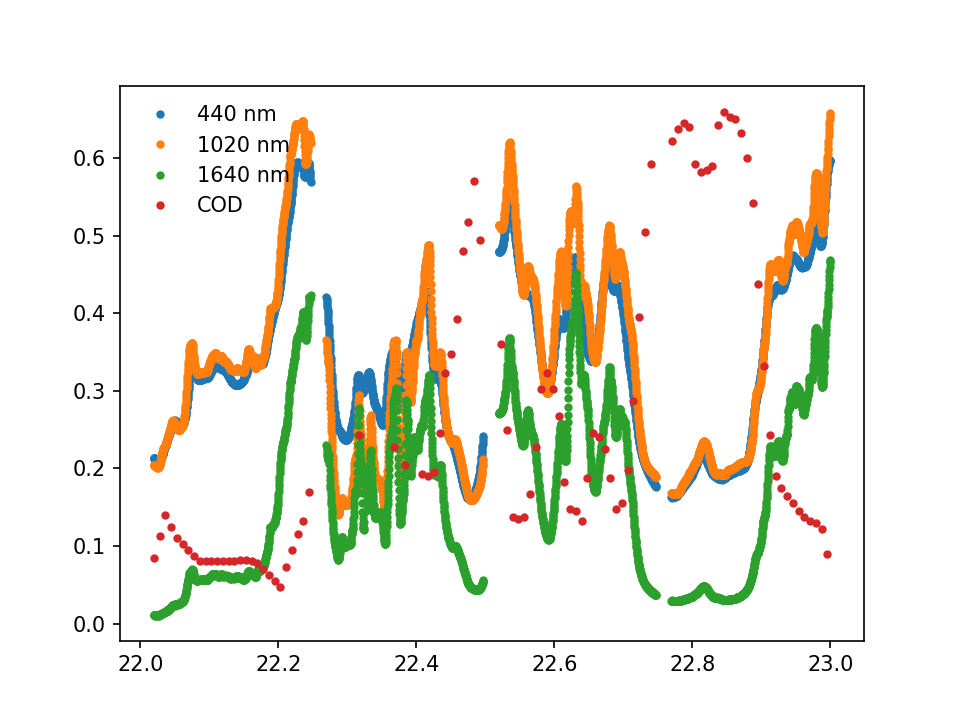

In [235]:
plt.figure()
plt.plot(rsp[1]['utc'],rsp[1]['t0440'],'.',label='440 nm')
plt.plot(rsp[1]['utc'],rsp[1]['t1020'],'.',label='1020 nm')
plt.plot(rsp[1]['utc'],rsp[1]['t1640'],'.',label='1640 nm')

plt.plot(rtr[1]['tmhrs'],rtr[1]['tau_rtm']/100.0,'.',label='COD')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


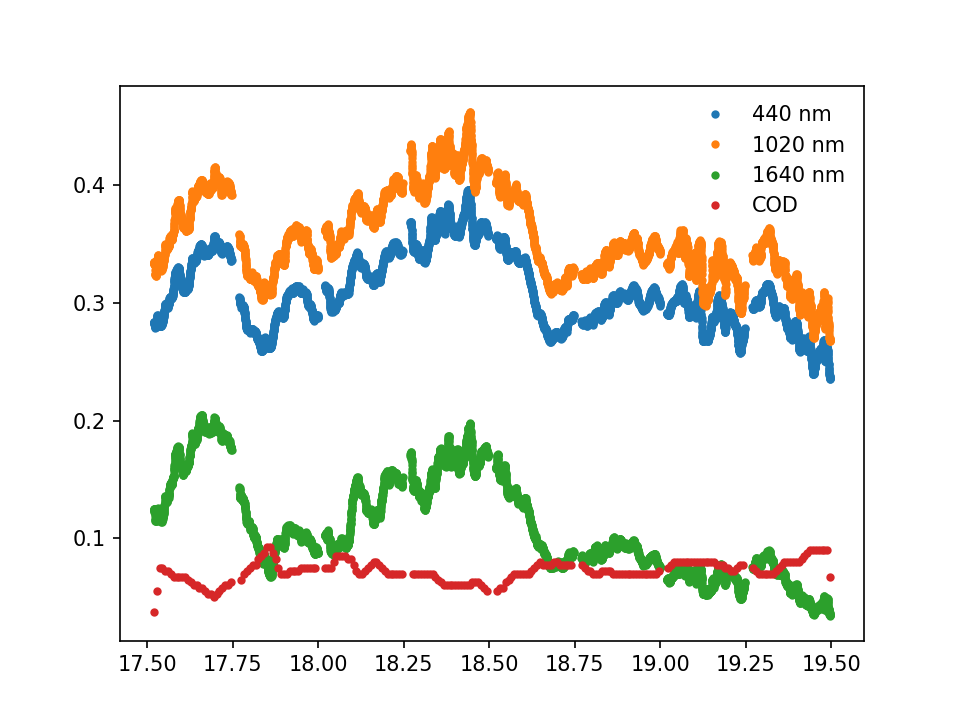

In [236]:
plt.figure()
plt.plot(rsp[2]['utc'],rsp[2]['t0440'],'.',label='440 nm')
plt.plot(rsp[2]['utc'],rsp[2]['t1020'],'.',label='1020 nm')
plt.plot(rsp[2]['utc'],rsp[2]['t1640'],'.',label='1640 nm')

plt.plot(rtr[2]['tmhrs'],rtr[2]['tau_rtm']/100.0,'.',label='COD')
plt.legend(frameon=False)


<IPython.core.display.Javascript object>


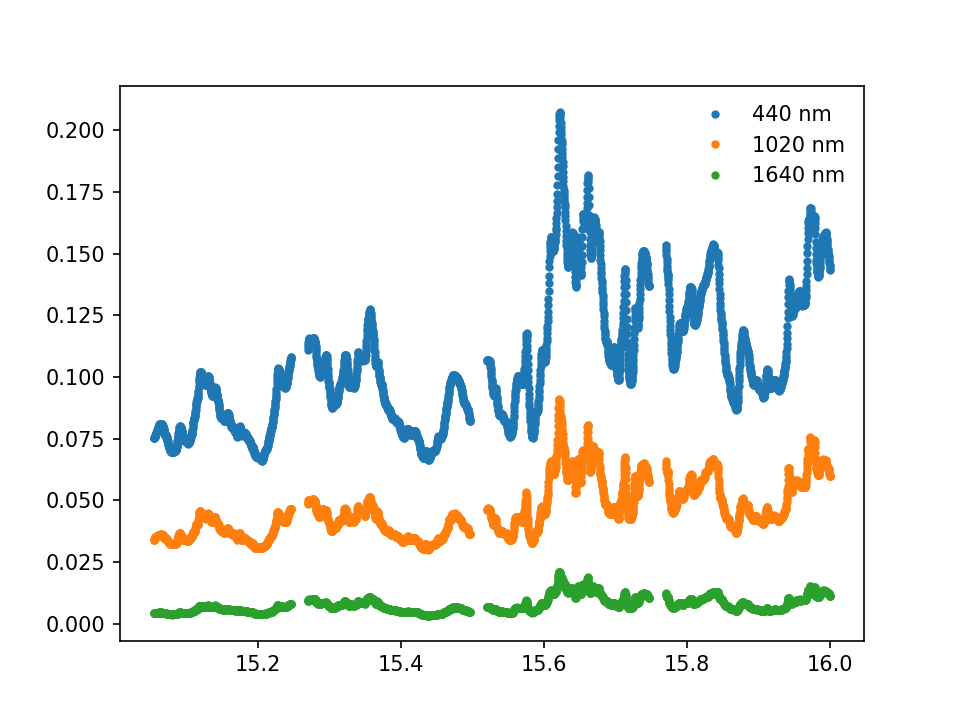

In [237]:
plt.figure()
plt.plot(rsp[0]['utc'],rsp[0]['s0440'],'.',label='440 nm')
plt.plot(rsp[0]['utc'],rsp[0]['s1020'],'.',label='1020 nm')
plt.plot(rsp[0]['utc'],rsp[0]['s1640'],'.',label='1640 nm')
plt.legend(frameon=False)

In [238]:
from write_utils import nearest_neighbor

In [239]:
for i,rr in enumerate(rtr):
    rr['sza'] = nearest_neighbor(rsp[i]['utc'],rsp[i]['sza'],rr['tmhrs'],dist=2.0/3600.0)
    rr['t0440'] = nearest_neighbor(rsp[i]['utc'],rsp[i]['t0440'],rr['tmhrs'],dist=2.0/3600.0)
    rr['t1020'] = nearest_neighbor(rsp[i]['utc'],rsp[i]['t1020'],rr['tmhrs'],dist=2.0/3600.0)
    rr['t1640'] = nearest_neighbor(rsp[i]['utc'],rsp[i]['t1640'],rr['tmhrs'],dist=2.0/3600.0)
    rr['doy'] = nearest_neighbor(rsp[i]['utc'],rsp[i]['doy'],rr['tmhrs'],dist=2.0/3600.0)

<IPython.core.display.Javascript object>


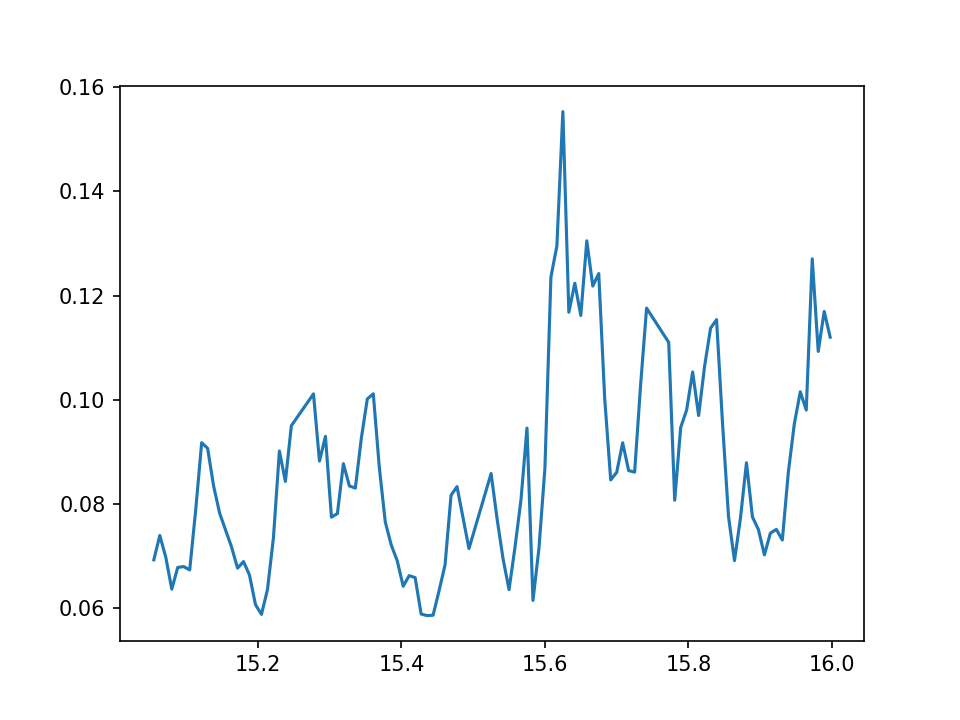

In [214]:
plt.figure()
plt.plot(rtr[0]['tmhrs'],rtr[0]['t0440'])

## Save liquid cloud in format

In [215]:
dict_fliq =  {'Start_UTC':{'data':rtr[0]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rtr[0]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'},
      'DOY':{'data':rtr[0]['doy'],'unit':'fractional day of year','format':'3.6f',
                           'long_description':'number of days since the start of the year, representing portion of days as fractional.'},
      'T0440':{'data':rtr[0]['t0440'],'unit':'None','long_description':'Atmospheric transmittance at 440 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1020':{'data':rtr[0]['t1020'],'unit':'None','long_description':'Atmospheric transmittance at 1020 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1640':{'data':rtr[0]['t1640'],'unit':'None','long_description':'Atmospheric transmittance at 1640 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'COD':{'data':rtr[0]['tau_rtm'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud','format':'2.1f'},
      'REF':{'data':rtr[0]['ref_rtm'],'unit':'micrometer','format':'2.1f',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'LWP':{'data':5.0/9.0 * rtr[0]['tau_rtm']* rtr[0]['ref_rtm'],'unit':'g/meter^2','long_description':'Calculated Liquid Water Path of overlying cloud, (5/9*COD*REF) assuming linearly increasing effective radius with altitude (based on Wood and Hartmann, 2006, J. Clim., https://doi.org/10.1175/JCLI3702.1)'},
      'COD_err_low':{'data':rtr[0]['tau_err'][0,:],'unit':'None','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[0]['tau_err'][1,:],'unit':'None','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[0]['ref_err'][0,:],'unit':'micrometer','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[0]['ref_err'][1,:],'unit':'micrometer','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[0]['wp_rtm'],'unit':'None','format':'1.0f',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[0]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [216]:
hdict_fliq = hdict
hdict_fliq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [217]:
wu.write_ict(hdict_fliq,dict_fliq,filepath=fp,
              data_id='SSFR_Trans15params_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order,delim=' ')  

DOY
SZA
T0440
T1020
T1640
COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
LWP
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-Trans15params-CLD_Boulder_20120525_R0.ict


## Save mix-phase cloud in format

In [218]:
dict_fmix =  {'Start_UTC':{'data':rtr[1]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rtr[1]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'},
      'DOY':{'data':rtr[1]['doy'],'unit':'fractional day of year','format':'3.6f',
             'long_description':'number of days since the start of the year, representing portion of days as fractional.'},
      'T0440':{'data':rtr[1]['t0440'],'unit':'None','long_description':'Atmospheric transmittance at 440 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1020':{'data':rtr[1]['t1020'],'unit':'None','long_description':'Atmospheric transmittance at 1020 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1640':{'data':rtr[1]['t1640'],'unit':'None','long_description':'Atmospheric transmittance at 1640 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'COD':{'data':rtr[1]['tau_rtm'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud','format':'2.1f'},
      'REF':{'data':rtr[1]['ref_rtm'],'unit':'micrometer','format':'2.1f',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'LWP':{'data':5.0/9.0 * rtr[1]['tau_rtm']* rtr[1]['ref_rtm'],'unit':'g/meter^2','long_description':'Calculated Liquid Water Path of overlying cloud, (5/9*COD*REF) assuming linearly increasing effective radius with altitude (based on Wood and Hartmann, 2006, J. Clim., https://doi.org/10.1175/JCLI3702.1)'},
      'COD_err_low':{'data':rtr[1]['tau_err'][0,:],'unit':'None','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[1]['tau_err'][1,:],'unit':'None','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[1]['ref_err'][0,:],'unit':'micrometer','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[1]['ref_err'][1,:],'unit':'micrometer','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[1]['wp_rtm'],'unit':'None','format':'1.0f',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[1]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [219]:
hdict_mix = hdict
hdict_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [220]:
wu.write_ict(hdict_mix,dict_fmix,filepath=fp,
              data_id='SSFR_Trans15params_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order,delim=' ') 

DOY
SZA
T0440
T1020
T1640
COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
LWP
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-Trans15params-CLD_Boulder_20120806_R0.ict


## Save ice cloud in format

In [221]:
dict_fice =  {'Start_UTC':{'data':rtr[2]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'SZA':{'data':rtr[2]['sza'],'unit':'degrees','long_description':'Solar Zenith Angle of observations'},
      'DOY':{'data':rtr[2]['doy'],'unit':'fractional day of year','format':'3.6f',
             'long_description':'number of days since the start of the year, representing portion of days as fractional.'},
      'T0440':{'data':rtr[2]['t0440'],'unit':'None','long_description':'Atmospheric transmittance at 440 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1020':{'data':rtr[2]['t1020'],'unit':'None','long_description':'Atmospheric transmittance at 1020 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'T1640':{'data':rtr[2]['t1640'],'unit':'None','long_description':'Atmospheric transmittance at 1640 nm, using Kurudz [1992], top-of-atmosphere solar incident irradiance, adjusted for earth-sun distance and solar zenith angle.'},
      'COD':{'data':rtr[2]['tau_rtm'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud','format':'2.1f'},
      'REF':{'data':rtr[2]['ref_rtm'],'unit':'micrometer','format':'2.1f',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'LWP':{'data':5.0/9.0 * rtr[2]['tau_rtm']* rtr[2]['ref_rtm'],'unit':'g/meter^2',
             'long_description':'Calculated Liquid Water Path of overlying cloud, (5/9*COD*REF) assuming linearly increasing effective radius with altitude (based on Wood and Hartmann, 2006, J. Clim., https://doi.org/10.1175/JCLI3702.1)'},
      'COD_err_low':{'data':rtr[2]['tau_err'][0,:],'unit':'None','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[2]['tau_err'][1,:],'unit':'None','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[2]['ref_err'][0,:],'unit':'micrometer','format':'2.1f',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[2]['ref_err'][1,:],'unit':'micrometer','format':'2.1f',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[2]['wp_rtm'],'unit':'None','format':'1.0f',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[2]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [222]:
hdict_ice = hdict
hdict_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [224]:
wu.write_ict(hdict_ice,dict_fice,filepath=fp,
              data_id='SSFR_Trans15params_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order,delim=' ') 

DOY
SZA
T0440
T1020
T1640
COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
LWP
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-Trans15params-CLD_Boulder_20130110_R0.ict
